#### Dataset

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn as skl
import seaborn as sns
import matplotlib as mpl

from matplotlib import (
    pyplot as plt,
    patches
)

Configurations

In [2]:
pd.options.display.float_format = '{:.4g}'.format
sns.set_theme(style='darkgrid', palette='muted')
# Hope the output type is pandas
skl.set_config(transform_output='pandas')

Features

In [3]:
# To call the parameters in need easily
class ft:
    """Features in `Machine Failure` Dataset"""
    udi = 'UDI'
    product_id = 'Product ID'
    type = 'Type'
    air_temperature = 'Air temperature [K]'
    process_temperature = 'Process temperature [K]'
    rotational_speed = 'Rotational speed [rpm]'
    torque = 'Torque [Nm]'
    tool_wear = 'Tool wear [min]'
    twf = 'TWF'
    hdf = 'HDF'
    pwf = 'PWF'
    osf = 'OSF'
    rnf = 'RNF'
    machine_failure = 'Machine failure'
    index = [
        udi,
        product_id,
    ]
    categorical = [
        type
    ]
    continuous = [
        air_temperature,
        process_temperature,
        rotational_speed,
        torque,
        tool_wear,
    ]
    # Just "0" or "1"
    discrete = [
        twf,
        hdf,
        pwf,
        osf,
        rnf,
    ]
    features = categorical + continuous + discrete
    target = [machine_failure]
    numeric = continuous + discrete + target
    all = index + features + target

Read Dataset

In [4]:
from pathlib import Path

data = pd.read_csv(
    Path('data/machine failure.csv'),
    dtype=(
        {ft.type: pd.CategoricalDtype(['H', 'M', 'L'], True)} |
        dict.fromkeys(ft.continuous, 'f') |
        dict.fromkeys(ft.discrete + ft.target, 'b')
    ),
    index_col=ft.index
)

data.head()

Type  Air temperature [K]  Process temperature [K]  \
UDI Product ID                                                      
1   M14860        M                298.1                    308.6   
2   L47181        L                298.2                    308.7   
3   L47182        L                298.1                    308.5   
4   L47183        L                298.2                    308.6   
5   L47184        L                298.2                    308.7   

                Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  \
UDI Product ID                                                         
1   M14860                        1551         42.8                0   
2   L47181                        1408         46.3                3   
3   L47182                        1498         49.4                5   
4   L47183                        1433         39.5                7   
5   L47184                        1408           40                9   

                Machine failure  TWF  HDF  PWF  OSF  RNF  
UDI Product ID                                            
1   M14860                    0    0    0    0    0    0  
2   L47181                    0    0    0    0    0    0  
3   L47182                    0    0    0    0    0    0  
4   L47183                    0    0    0    0    0    0  
5   L47184                    0    0    0    0    0    0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10000 entries, (1, 'M14860') to (10000, 'M24859')
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Type                     10000 non-null  category
 1   Air temperature [K]      10000 non-null  float32 
 2   Process temperature [K]  10000 non-null  float32 
 3   Rotational speed [rpm]   10000 non-null  float32 
 4   Torque [Nm]              10000 non-null  float32 
 5   Tool wear [min]          10000 non-null  float32 
 6   Machine failure          10000 non-null  int8    
 7   TWF                      10000 non-null  int8    
 8   HDF                      10000 non-null  int8    
 9   PWF                      10000 non-null  int8    
 10  OSF                      10000 non-null  int8    
 11  RNF                      10000 non-null  int8    
dtypes: category(1), float32(5), int8(6)
memory usage: 975.3+ KB


#### Visualization

##### Continuous

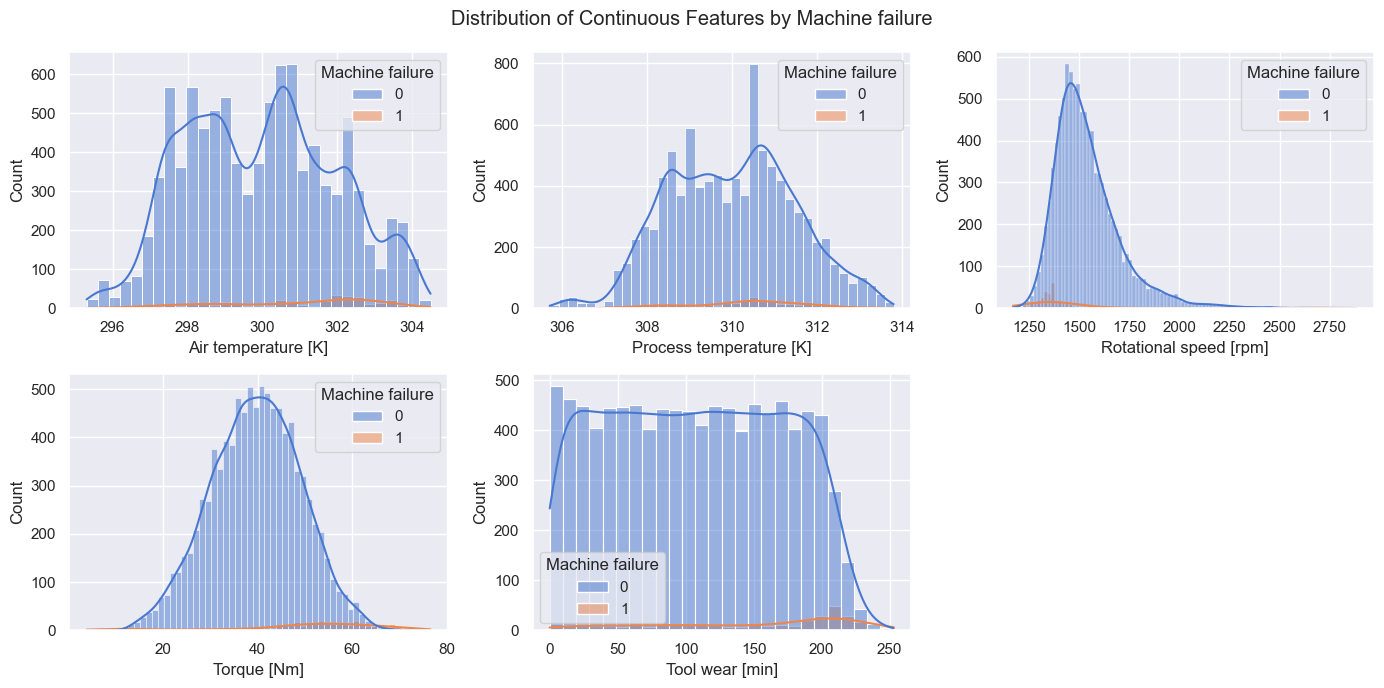

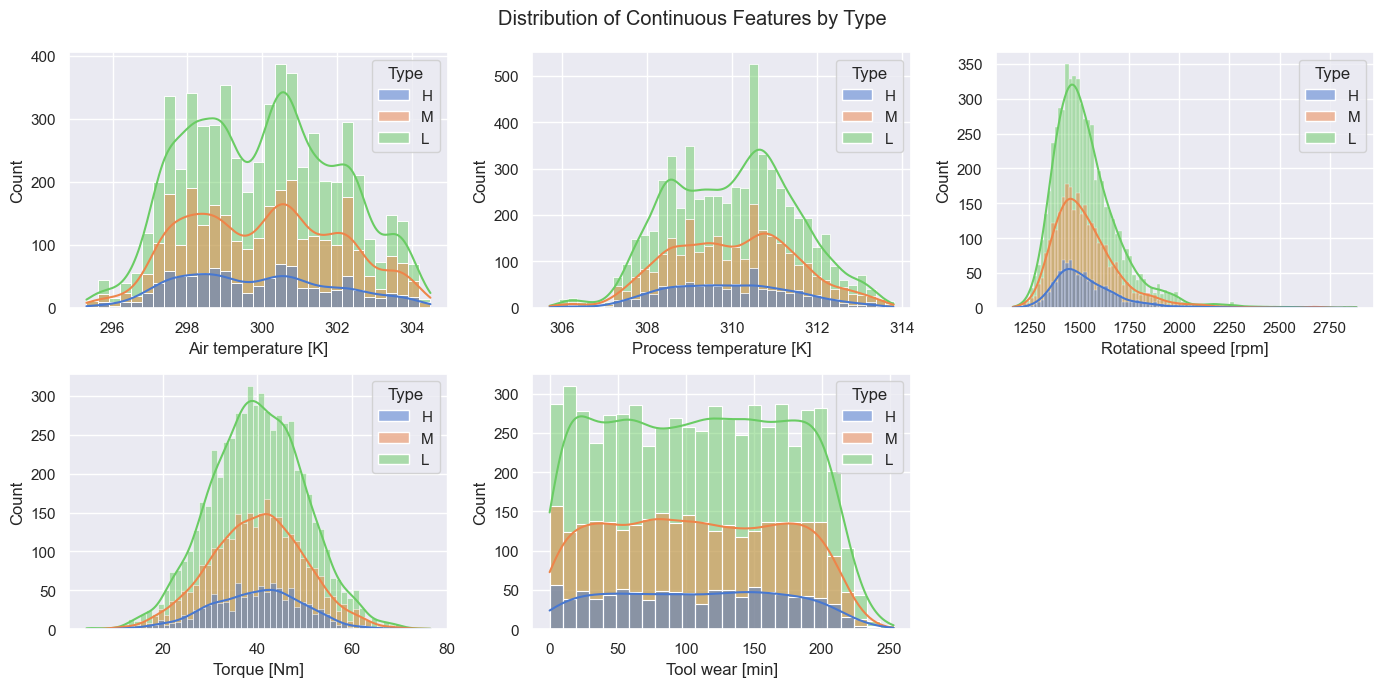

In [6]:
for hue in ft.machine_failure, ft.type:

    fig, axes = plt.subplots(2, 3, figsize=(14, 7))

    ax: plt.Axes

    *axes, ax = axes.ravel()
    ax.remove()

    for ax, feature in zip(axes, ft.continuous):
        sns.histplot(
            data,
            x=feature,
            hue=hue,
            kde=True,
            ax=ax
        )

    fig.suptitle(f'Distribution of Continuous Features by {hue}')
    fig.tight_layout()
    plt.show()

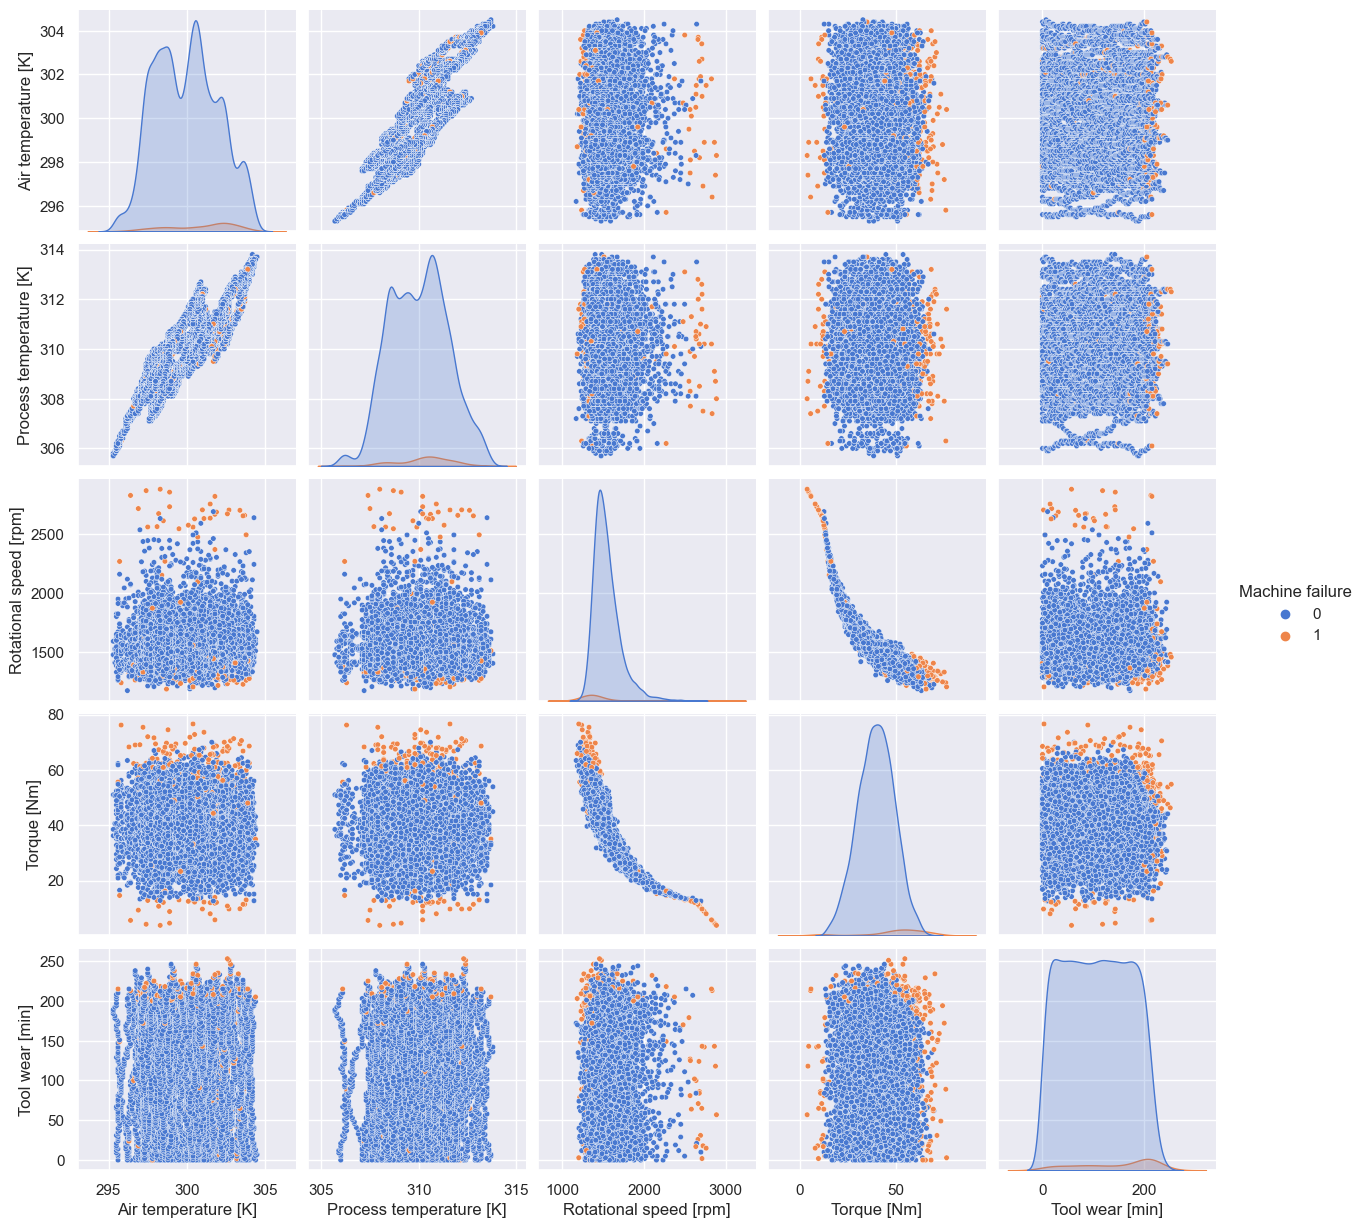

In [7]:
sns.pairplot(
    data,
    vars=ft.continuous,
    hue=ft.machine_failure,
    plot_kws={'s': 16},
)
plt.show()

##### Discrete

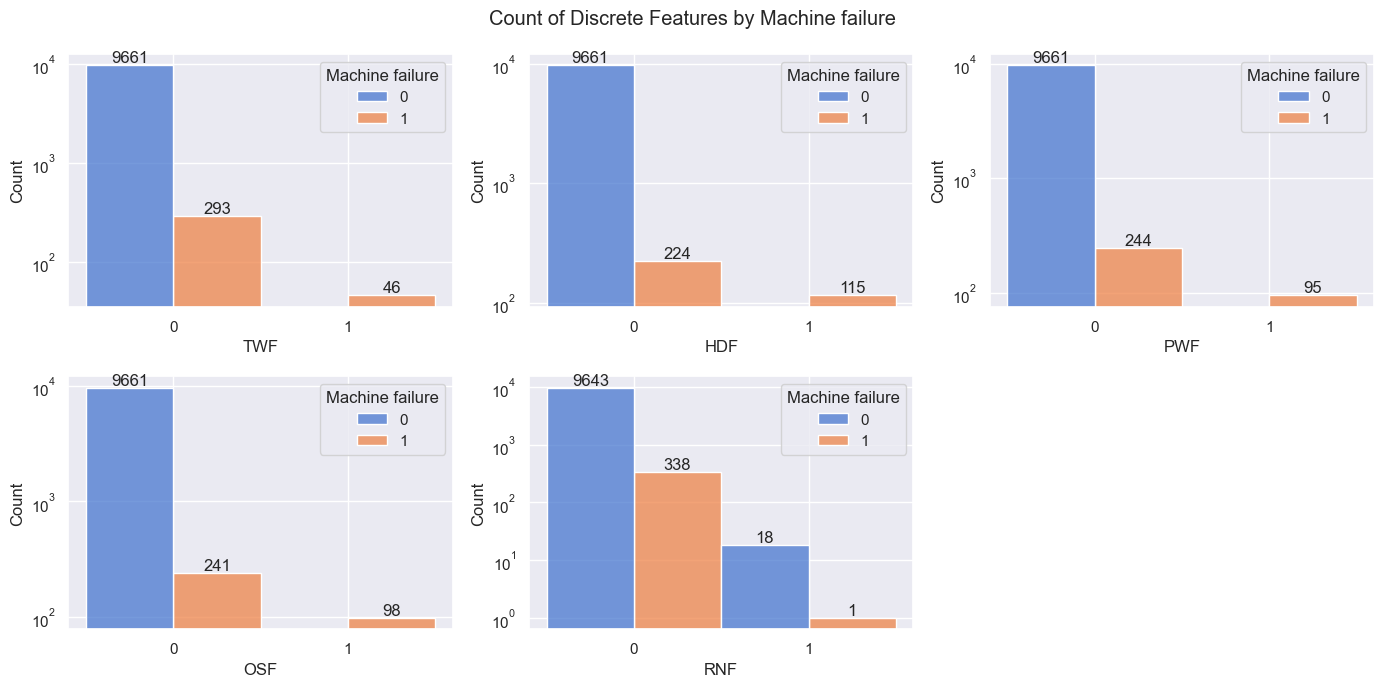

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(14, 7))

# ax: plt.Axes
# rect: patches.Rectangle

*axes, ax = axes.ravel()
ax.remove()

for ax, feature in zip(axes, ft.discrete):

    sns.histplot(
        data,
        x=feature,
        hue=ft.machine_failure,
        bins=2,
        discrete=True,
        multiple='dodge',  # 設定0/1兩類的machine failure分布不疊圖
        log_scale=(False, True),
        ax=ax,
    )

    for rect in ax.patches:
        y = rect.get_y() + rect.get_height()
        x = rect.get_x() + rect.get_width() / 2
        ax.annotate(f'{y:g}', (x, y), ha='center', va='bottom')

    ax.set_xticks([0, 1])


fig.suptitle(f'Count of Discrete Features by {ft.machine_failure}')
fig.tight_layout()
plt.show()

When `Machine failure` is 0, discrete features are usually also 0, except for `RNF`.

In [9]:
pd.crosstab(data[ft.machine_failure], data[ft.rnf])

RNF                 0   1
Machine failure          
0                9643  18
1                 338   1

##### Categorical

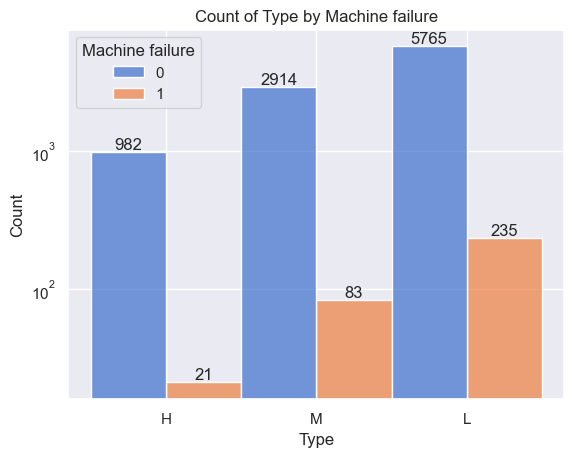

In [10]:
fig, ax = plt.subplots()

sns.histplot(
    data,
    x=ft.type,
    hue=ft.machine_failure,
    stat='count',
    bins=3,
    discrete=True,
    multiple='dodge',
    log_scale=(False, True),
    ax=ax,
)

rect: patches.Rectangle

for rect in ax.patches:
    y = rect.get_y() + rect.get_height()
    x = rect.get_x() + rect.get_width() / 2
    ax.annotate(f'{y:.0f}', (x, y), ha='center', va='bottom')

ax.set_title(f'Count of {ft.type} by {ft.machine_failure}')
plt.show()

P ( `Machine failure` | `Type` )


In [11]:
pd.crosstab(data[ft.machine_failure], data[ft.type], normalize='columns')

Type                  H       M       L
Machine failure                        
0                0.9791  0.9723  0.9608
1               0.02094 0.02769 0.03917

##### Correlation

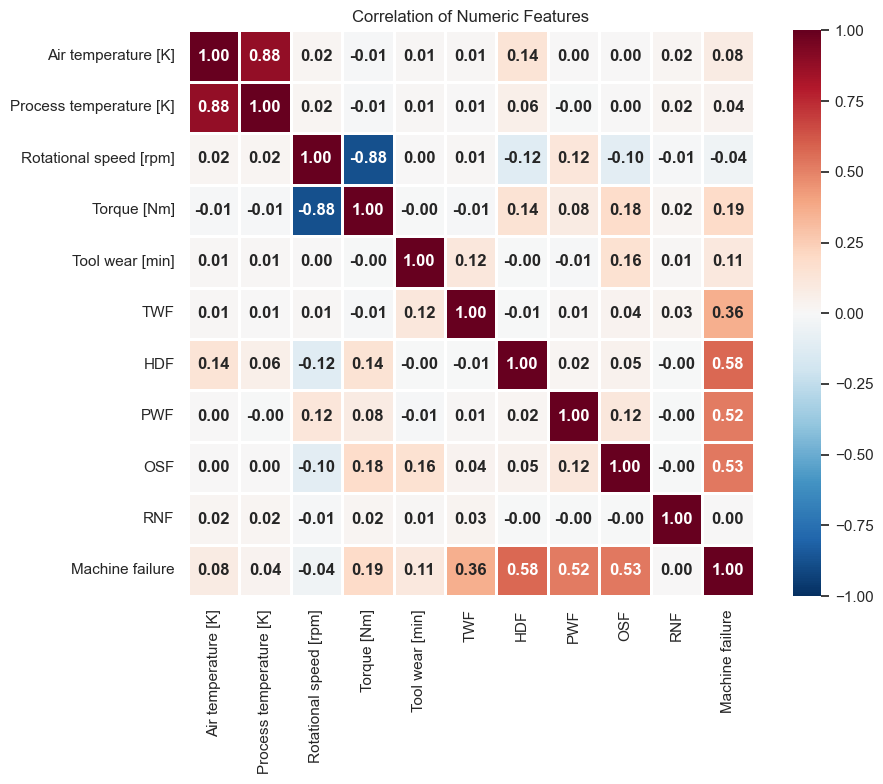

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(
    data[ft.continuous+ft.discrete+ft.target].corr(),
    vmin=-1,
    vmax=1,
    cmap='RdBu_r',
    annot=True,
    annot_kws={'size': 12, 'weight': 'bold'},
    fmt='.2f',
    square=True,
    linewidths=1,
    ax=ax
)

ax.set_title('Correlation of Numeric Features')
fig.tight_layout()
plt.show()

#### Model

##### Data Preprocessing

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, TargetEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

x_train: pd.DataFrame
x_test: pd.DataFrame

y_train: pd.Series
y_test: pd.Series

x_train, x_test, y_train, y_test = train_test_split(
    data[ft.features],
    data[ft.machine_failure],
    random_state=0
)

# Usr pip-line to set up the process flow 
pipe = make_pipeline(
    make_column_transformer(
        (TargetEncoder(random_state=0), ft.categorical),
        remainder='passthrough',
        verbose_feature_names_out=False,
    ),
    StandardScaler(),
)

x_train = pipe.fit_transform(x_train, y_train)
x_test = pipe.transform(x_test)

x_train.head()

Type  Air temperature [K]  Process temperature [K]  \
UDI  Product ID                                                         
2968 L50147      0.6802               0.3012                  -0.4035   
701  M15560      -1.215               -1.194                  -0.8056   
3482 L50661      0.6191                0.999                   0.6017   
1622 L48801      0.8705               -1.144                    -1.61   
801  M15660     -0.7173               -1.493                   -1.409   

                 Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  \
UDI  Product ID                                                         
2968 L50147                     -0.9497        1.167          -0.5603   
701  M15560                      0.8042      -0.8381           -0.435   
3482 L50661                      0.6925      -0.8481          -0.4036   
1622 L48801                       1.704       -1.811          -0.7171   
801  M15660                       1.916        -1.58          -0.1529   

                     TWF    HDF      PWF      OSF      RNF  
UDI  Product ID                                             
2968 L50147     -0.06847 -0.109 -0.09982 -0.09706 -0.04325  
701  M15560     -0.06847 -0.109 -0.09982 -0.09706 -0.04325  
3482 L50661     -0.06847 -0.109 -0.09982 -0.09706 -0.04325  
1622 L48801     -0.06847 -0.109 -0.09982 -0.09706 -0.04325  
801  M15660     -0.06847 -0.109 -0.09982 -0.09706 -0.04325

In [14]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('targetencoder',
                                                  TargetEncoder(random_state=0),
                                                  ['Type'])],
                                   verbose_feature_names_out=False)),
                ('standardscaler', StandardScaler())])

##### PCA

In [15]:
# Deal with all the features for PCA
from sklearn.decomposition import PCA

components: pd.DataFrame

pca = PCA()
components = pca.fit_transform(x_train)

components.head()

pca0   pca1    pca2     pca3    pca4    pca5    pca6  \
UDI  Product ID                                                          
2968 L50147     -1.372 0.2337 -0.5594  -0.2421  0.4575 -0.2726 -0.3995   
701  M15560      1.265  1.339 -0.2563  0.05633 -0.9445  0.4903  0.3677   
3482 L50661      1.018 -1.194 -0.1772  -0.3306  0.4708 -0.3108 -0.1131   
1622 L48801      2.529  1.713 0.05593  -0.6561  0.7076 -0.4628  0.5895   
801  M15660      2.529  1.825  0.2094 -0.07839 -0.4962  0.2214  0.7017   

                   pca7     pca8    pca9     pca10  
UDI  Product ID                                     
2968 L50147      0.5382 -0.02199 -0.5128    0.1676  
701  M15560     -0.3008   0.4776  0.2782 -0.004075  
3482 L50661      0.2256    0.256 -0.2874   -0.1009  
1622 L48801      0.3638   0.5732  -0.312  -0.06257  
801  M15660     -0.3675    0.436 0.07147    0.2527

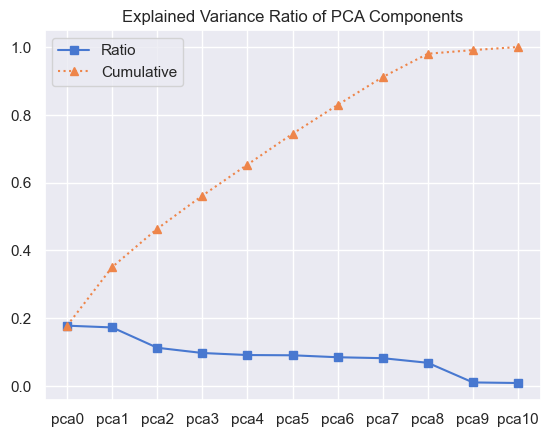

In [16]:
ax = plt.subplot()

xlabels = pca.get_feature_names_out()

ratio = pca.explained_variance_ratio_
cumulative = ratio.cumsum()

ax.plot(xlabels, ratio, 's-', label='Ratio')
ax.plot(xlabels, cumulative, '^:', label='Cumulative')

ax.set_title('Explained Variance Ratio of PCA Components')
ax.legend()

plt.show()

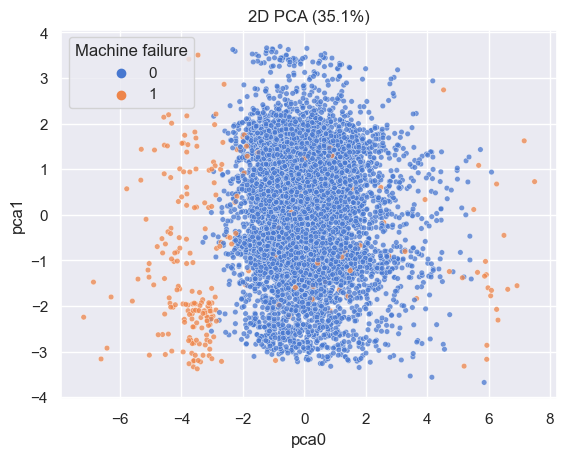

In [17]:
sns.scatterplot(
    components,
    x=xlabels[0],
    y=xlabels[1],
    hue=y_train,
    s=16,
    alpha=0.75,
)

plt.title(f'2D PCA ({cumulative[1]:.1%})')
plt.show()

In [18]:
import plotly.express as px

components[ft.machine_failure] = y_train.astype('O')

px.scatter(
    components,
    *xlabels[:2],
    ft.machine_failure,
    opacity=0.75,
    title=f'2D PCA ({cumulative[1]:.1%})',
    height=450,
    width=600,
).show()

px.scatter_3d(
    components,
    *xlabels[:3],
    ft.machine_failure,
    opacity=0.8,
    title=f'3D PCA ({cumulative[2]:.1%})',
    height=450,
    width=600,
).update_traces(
    marker={'size': 1.5}
).show()

##### Metrics

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
mlp = MLPClassifier(random_state=0).fit(x_train, y_train)
y_prob = mlp.predict_proba(x_test).T[1]
score = roc_auc_score(y_test, y_prob)

score

0.9734047565204281

[ *TN* | *FP* ]  
[ *FN* | *TP* ]

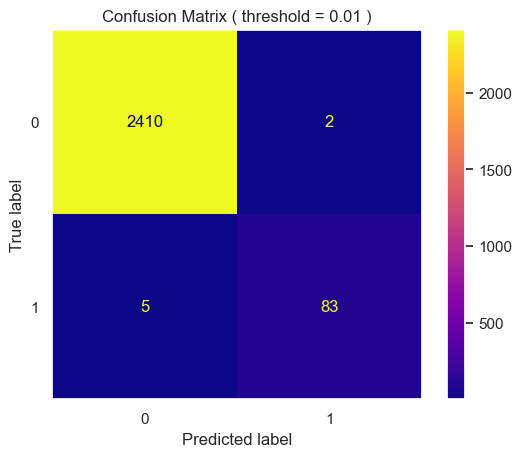

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
# Under prob=0.01
threshold = 0.01
ConfusionMatrixDisplay.from_predictions(
    y_test, y_prob > threshold, cmap='plasma')
plt.grid(False)
plt.title(f'Confusion Matrix ( {threshold = } )')
plt.show()

*FPR = FP / (TN + FP)*  
*TPR = TP / (TP + FN)*  

Our goal is to maximize TPR while keeping FPR as low as possible.  
In other word, FPR = 0 and TPR = 1.

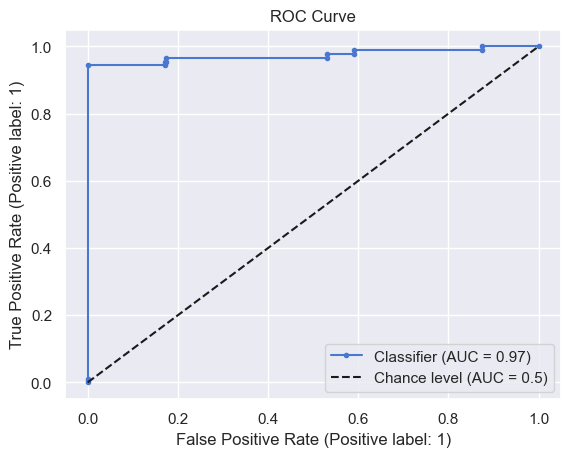

In [21]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_test,
    y_prob,
    marker='.',
    plot_chance_level=True
)
plt.title('ROC Curve')
plt.show()

##### Hyperparameters Tuning

Cross Validation

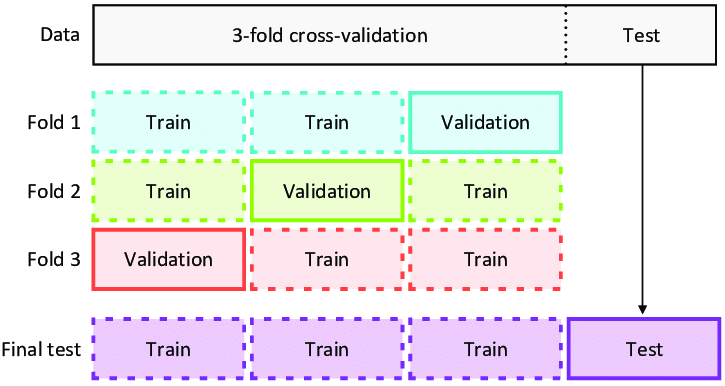

In [22]:
from sklearn.model_selection import GridSearchCV
mlp_gs = GridSearchCV(
    MLPClassifier(max_iter=400, random_state=0),
    {
        'hidden_layer_sizes': [(8, 4), (8, 8)],
        'batch_size': [200, 400, 800]
    },
    scoring='roc_auc',
).fit(x_train, y_train)

cv_result_df = pd.DataFrame.from_dict(mlp_gs.cv_results_, 'index')
cv_result_df.sort_values('rank_test_score', axis=1, inplace=True)
cv_result_df

5  \
mean_fit_time                                                        0.5091   
std_fit_time                                                        0.01359   
mean_score_time                                                    0.004306   
std_score_time                                                     0.001307   
param_batch_size                                                        800   
param_hidden_layer_sizes                                             (8, 8)   
params                    {'batch_size': 800, 'hidden_layer_sizes': (8, 8)}   
split0_test_score                                                    0.9971   
split1_test_score                                                         1   
split2_test_score                                                    0.9941   
split3_test_score                                                    0.9786   
split4_test_score                                                         1   
mean_test_score                                                       0.994   
std_test_score                                                     0.007985   
rank_test_score                                                           1   

                                                                          3  \
mean_fit_time                                                        0.5554   
std_fit_time                                                        0.03722   
mean_score_time                                                    0.004736   
std_score_time                                                     0.001444   
param_batch_size                                                        400   
param_hidden_layer_sizes                                             (8, 8)   
params                    {'batch_size': 400, 'hidden_layer_sizes': (8, 8)}   
split0_test_score                                                    0.9964   
split1_test_score                                                         1   
split2_test_score                                                    0.9923   
split3_test_score                                                    0.9774   
split4_test_score                                                         1   
mean_test_score                                                      0.9932   
std_test_score                                                     0.008424   
rank_test_score                                                           2   

                                                                          4  \
mean_fit_time                                                        0.9879   
std_fit_time                                                        0.03953   
mean_score_time                                                    0.004204   
std_score_time                                                     0.000728   
param_batch_size                                                        800   
param_hidden_layer_sizes                                             (8, 4)   
params                    {'batch_size': 800, 'hidden_layer_sizes': (8, 4)}   
split0_test_score                                                     0.991   
split1_test_score                                                         1   
split2_test_score                                                     0.991   
split3_test_score                                                     0.981   
split4_test_score                                                         1   
mean_test_score                                                      0.9926   
std_test_score                                                     0.007074   
rank_test_score                                                           3   

                                                                          2  \
mean_fit_time                                                        0.9838   
std_fit_time                                                        0.03469   
mean_score_time                           

In [23]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

lr_cv = LogisticRegressionCV(
    scoring='roc_auc',
    max_iter=400,
).fit(x_train, y_train)

# svm = SVC(probability=True).fit(x_train, y_train)

# knn = KNeighborsClassifier(weights='distance').fit(x_train, y_train)

rf = RandomForestClassifier(random_state=0).fit(x_train, y_train)

estimators = {
    'MLP': mlp,
    'MLP (GridSearchCV)': mlp_gs,
    'Logistic (CV)': lr_cv,
    'RandomForest': rf
}

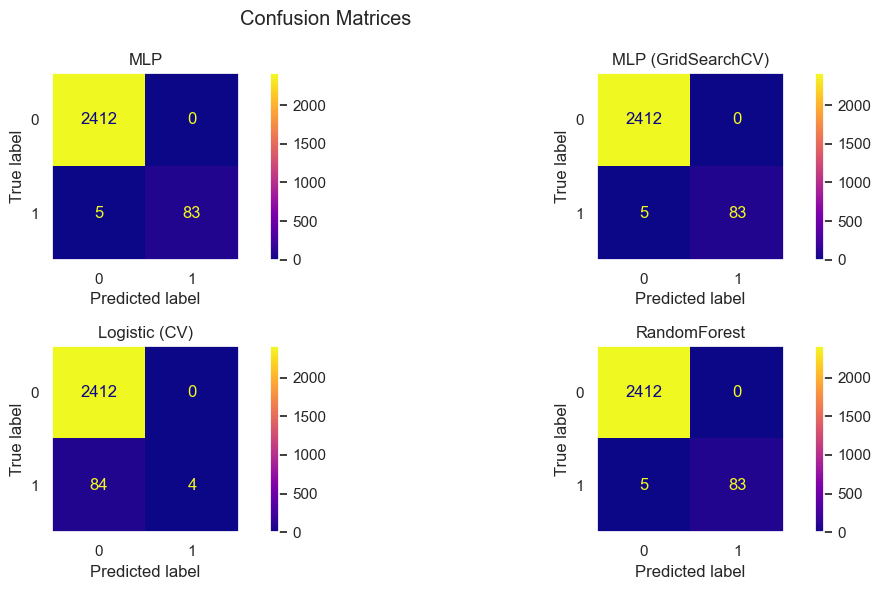

In [24]:
def draw_confusion_matrices(estimators):
    fig, axes = plt.subplots(2, 2, figsize=(12, 6))
    for ax, (k, v) in zip(axes.flat, estimators.items()):
        ConfusionMatrixDisplay.from_estimator(
            v,
            x_test,
            y_test,
            cmap='plasma',
            colorbar=True,
            ax=ax
        )
        ax.set_title(k)
        ax.grid(False)
    fig.suptitle('Confusion Matrices')
    fig.tight_layout()
    plt.show()


draw_confusion_matrices(estimators)

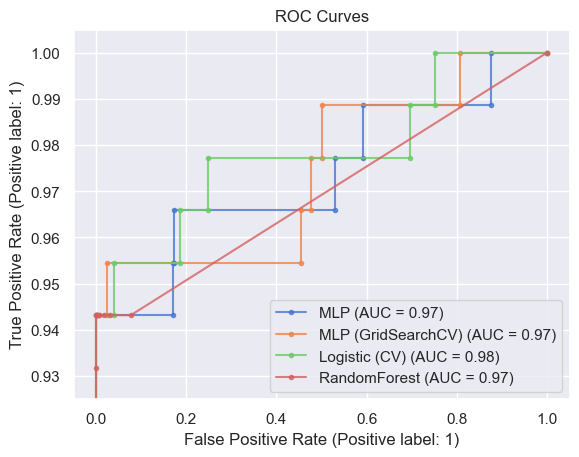

Score
Estimators               
Logistic (CV)      0.9782
MLP (GridSearchCV) 0.9743
MLP                0.9734
RandomForest       0.9694

In [25]:
def draw_roc_curves(estimators, ylim=(0.925, 1.005)):
    score_df = pd.DataFrame()
    score_df.index.name = 'Estimators'
    ax = plt.subplot()
    ax.set_ylim(*ylim)
    for k, v in estimators.items():
        rcd = RocCurveDisplay.from_estimator(
            v,
            x_test,
            y_test,
            alpha=0.8,
            marker='.',
            name=k,
            ax=ax
        )
        score_df.loc[k, 'Score'] = rcd.roc_auc
    ax.set_title('ROC Curves')
    plt.show()
    score_df.sort_values('Score', ascending=False, inplace=True)
    return score_df


draw_roc_curves(estimators)

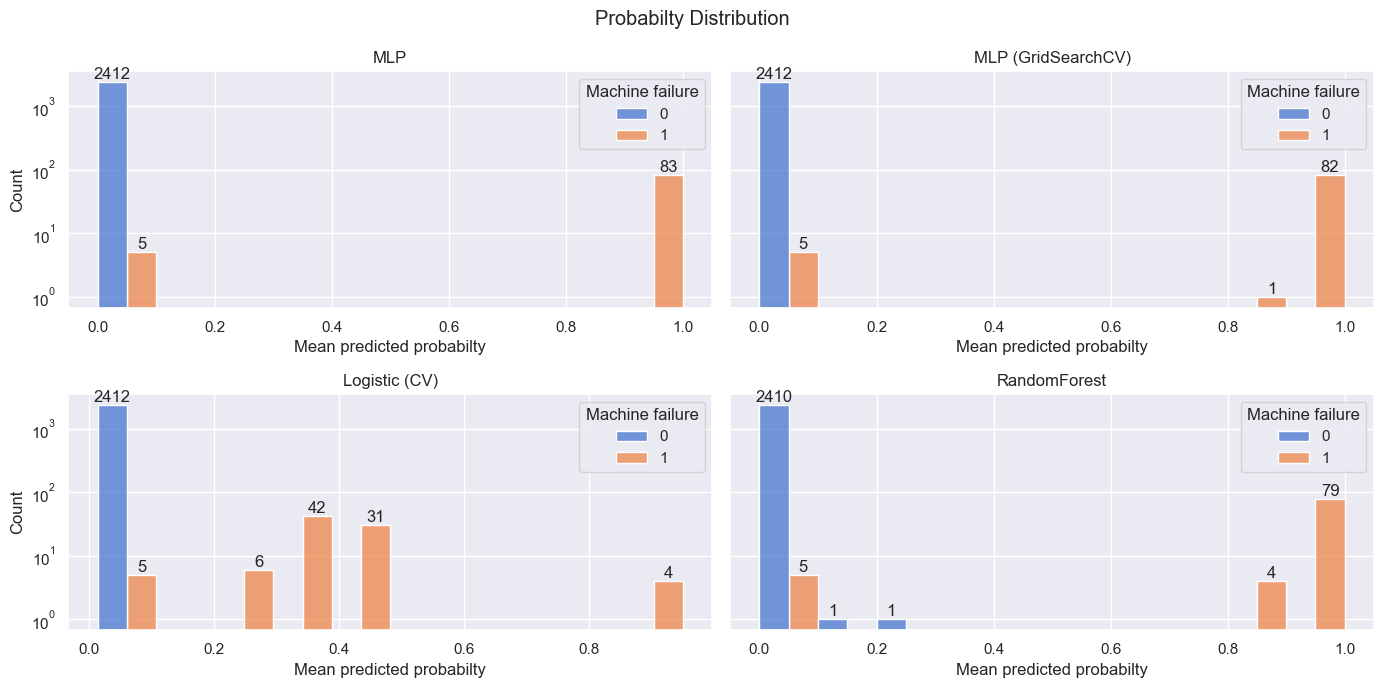

In [26]:
def draw_probabilty_distributions(estimators):

    fig, axes = plt.subplots(2, 2, sharey=True, figsize=(14, 7))
    for ax, (k, v) in zip(axes.flat, estimators.items()):
        sns.histplot(
            x=v.predict_proba(x_test).T[1],
            hue=y_test,
            bins=10,
            multiple='dodge',
            log_scale=(False, True),
            ax=ax,
        )
        for rect in ax.patches:
            y = rect.get_y() + rect.get_height()
            x = rect.get_x() + rect.get_width() / 2
            ax.annotate(f'{y:g}', (x, y), ha='center', va='bottom')
        ax.set_xlabel('Mean predicted probabilty')
        ax.set_title(k)
    fig.suptitle('Probabilty Distribution')
    fig.tight_layout()
    plt.show()


draw_probabilty_distributions(estimators)

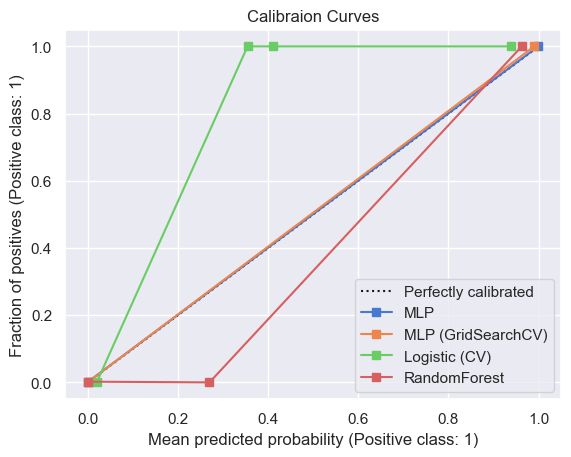

In [27]:
from sklearn.calibration import CalibrationDisplay


def draw_calibration_surves(estimators):
    ax = plt.subplot()
    for k, v in estimators.items():
        CalibrationDisplay.from_estimator(
            v,
            x_test,
            y_test,
            name=k,
            ax=ax
        )
    ax.set_title('Calibraion Curves')
    plt.show()


draw_calibration_surves(estimators)

##### Calibration

In [28]:
from sklearn.calibration import CalibratedClassifierCV

clb_estimators = {
    'MLP': mlp,
    'MLP (GridSearchCV)': mlp_gs,
    'Logistic (CV, Calibrated)': CalibratedClassifierCV(lr_cv).fit(x_train, y_train),
    # 'SVM (Calibrated)': CalibratedClassifierCV(svm).fit(x_train, y_train),
    # 'KNN (Calibrated)': CalibratㄋedClassifierCV(knn).fit(x_train, y_train),
    'RandomForest (Calibrated)': CalibratedClassifierCV(rf).fit(x_train, y_train)
}

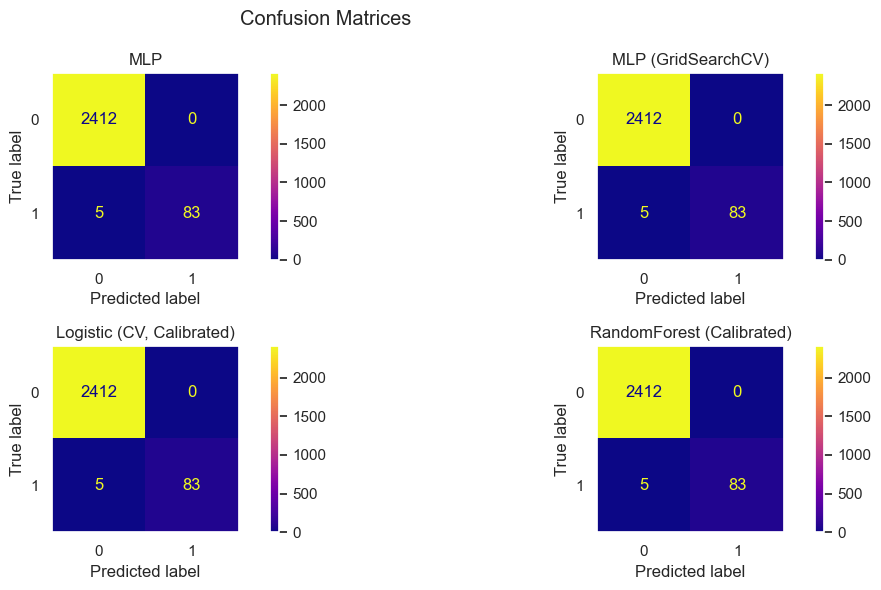

In [29]:
draw_confusion_matrices(clb_estimators)

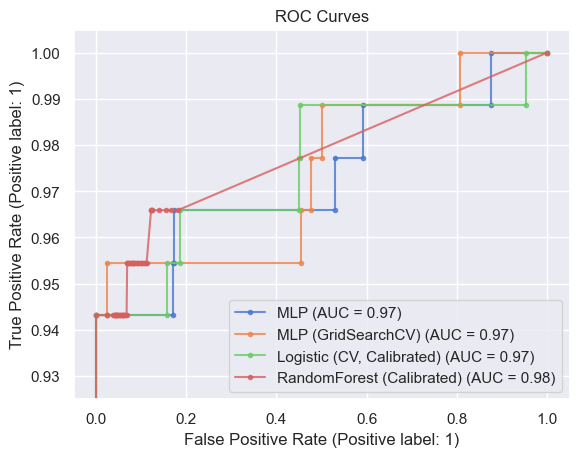

Score
Estimators                      
RandomForest (Calibrated) 0.9778
Logistic (CV, Calibrated)  0.975
MLP (GridSearchCV)        0.9743
MLP                       0.9734

In [30]:
draw_roc_curves(clb_estimators)

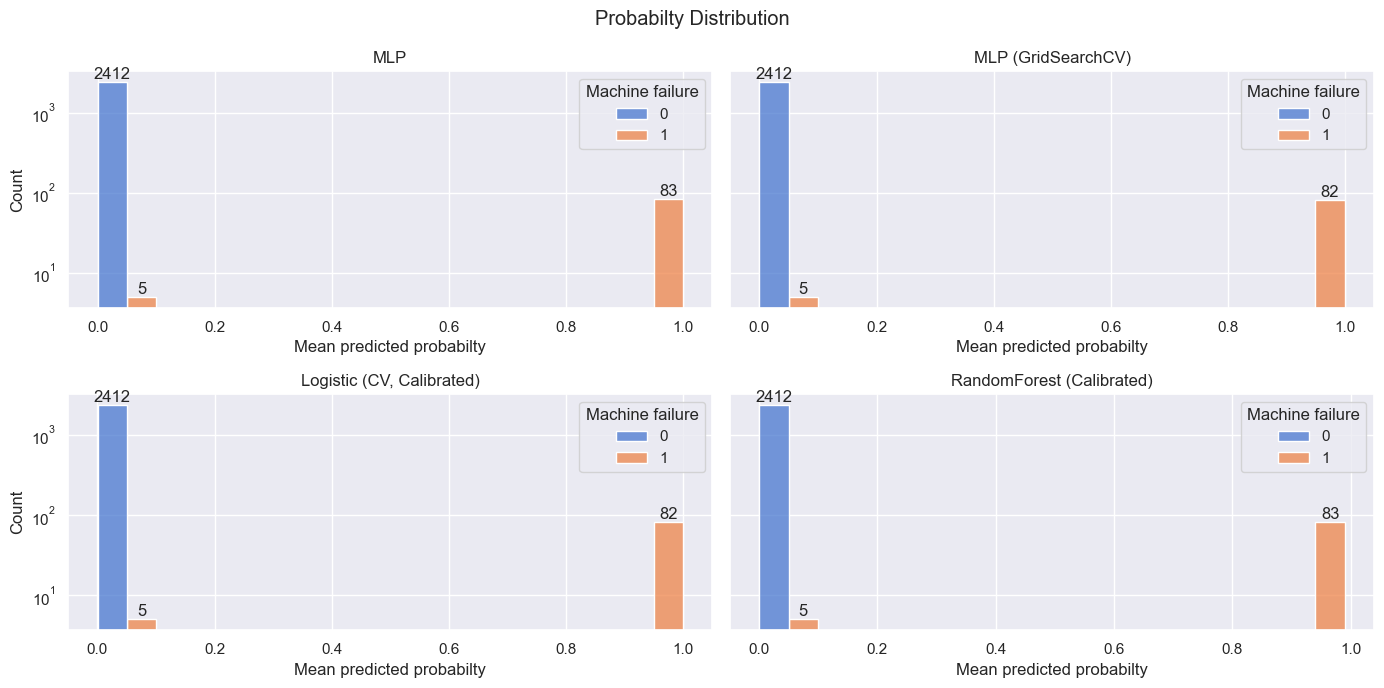

In [31]:
draw_probabilty_distributions(clb_estimators)

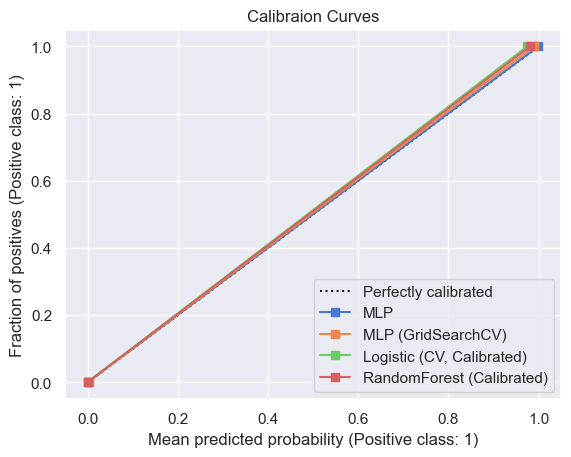

In [32]:
draw_calibration_surves(clb_estimators)

Best Model so far
* Logistic Regression CV
* Random Forest Classifier with Calibrated CV
* MLP Classifier

#### Feature Engineering

##### Limitations of Linear models

Decision Boundary with Continuous Features and PCA

In [33]:
_x_train = data[ft.continuous]
_y = data[ft.machine_failure]

_x_train = StandardScaler().fit_transform(_x_train, _y)

_x_train.head()

Air temperature [K]  Process temperature [K]  \
UDI Product ID                                                 
1   M14860                  -0.9524                  -0.9474   
2   L47181                  -0.9024                    -0.88   
3   L47182                  -0.9524                   -1.015   
4   L47183                  -0.9024                  -0.9474   
5   L47184                  -0.9024                    -0.88   

                Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
UDI Product ID                                                        
1   M14860                     0.06819       0.2822           -1.696  
2   L47181                     -0.7295       0.6333           -1.649  
3   L47182                     -0.2274       0.9443           -1.617  
4   L47183                       -0.59     -0.04885           -1.586  
5   L47184                     -0.7295     0.001313           -1.555

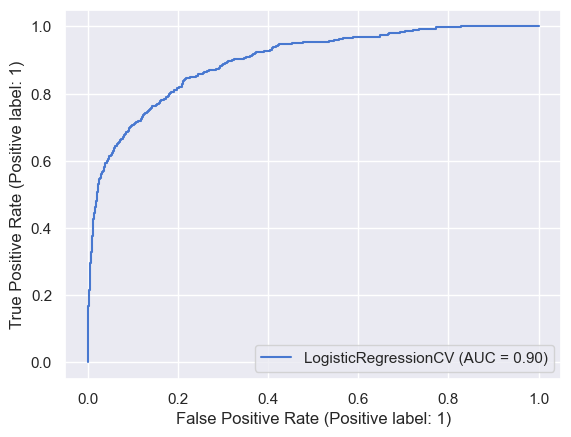

In [34]:
_lr_cv = LogisticRegressionCV(max_iter=800, scoring='roc_auc').fit(_x_train, _y)
RocCurveDisplay.from_estimator(_lr_cv, _x_train, _y)
plt.show()

c:\Users\User\anaconda3\envs\cuda_11.0\lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but LogisticRegressionCV was fitted with feature names



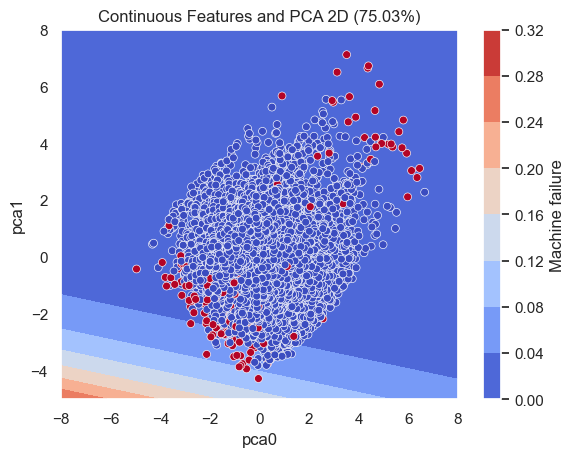

In [35]:
from sklearn.inspection import DecisionBoundaryDisplay

_pca = PCA(2)
_comp = _pca.fit_transform(_x_train)

n = 100
mesh = np.meshgrid(
    np.linspace(-8, 8, n),
    np.linspace(-5, 8, n),
    indexing='xy',
)

x_mesh = _pca.inverse_transform(np.dstack(mesh).reshape(n * n, 2))
y_mesh = _lr_cv.predict_proba(x_mesh)[:, 1].reshape(n, n)

db = DecisionBoundaryDisplay(
    xx0=mesh[0],
    xx1=mesh[1],
    response=y_mesh,
)
db.plot(cmap='coolwarm')

sns.scatterplot(
    _comp,
    x='pca0',
    y='pca1',
    hue=_y,
    hue_norm=(0, 1),
    s=32,
    palette='coolwarm',
    legend=False
)
plt.title(
    f'Continuous Features and PCA 2D ({_pca.explained_variance_ratio_.sum():.2%})')
plt.colorbar(db.surface_, label=ft.machine_failure)
plt.show()

Decision Boundary with 2 features

In [36]:
# ROC with torque and tool_wear
_x_train = data[[ft.torque, ft.tool_wear]]
_y = data[ft.machine_failure]
_x_train = StandardScaler().fit_transform(_x_train, _y)

_x_train.head()

Torque [Nm]  Tool wear [min]
UDI Product ID                              
1   M14860           0.2822           -1.696
2   L47181           0.6333           -1.649
3   L47182           0.9443           -1.617
4   L47183         -0.04885           -1.586
5   L47184         0.001313           -1.555

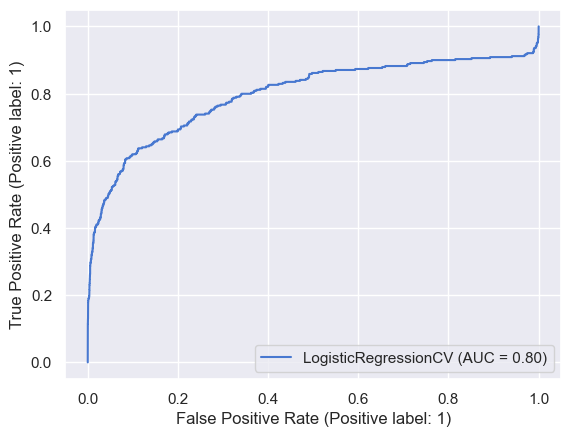

In [37]:
_lr_cv = LogisticRegressionCV(scoring='roc_auc').fit(_x_train, _y)
RocCurveDisplay.from_estimator(_lr_cv, _x_train, _y)
plt.show()

c:\Users\User\anaconda3\envs\cuda_11.0\lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but LogisticRegressionCV was fitted with feature names



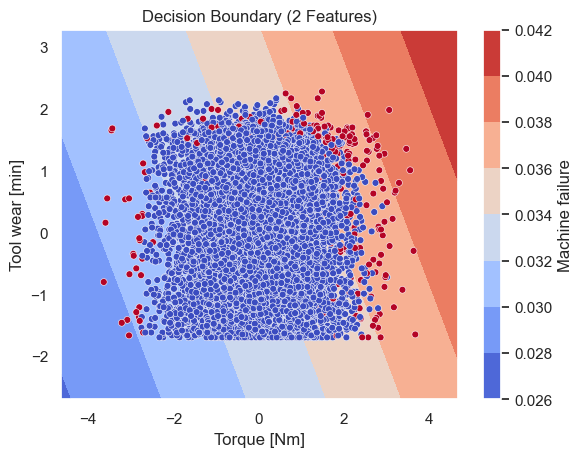

In [38]:
db = DecisionBoundaryDisplay.from_estimator(
    _lr_cv,
    _x_train.values,
    response_method='predict_proba',
    cmap='coolwarm'
)
sns.scatterplot(
    _x_train,
    x=ft.torque,
    y=ft.tool_wear,
    hue=_y,
    hue_norm=(0, 1),
    s=24,
    palette='coolwarm',
    legend=False
)
plt.title('Decision Boundary (2 Features)')
plt.colorbar(db.surface_, label=ft.machine_failure)
plt.show()

In [39]:
# from sklearn.preprocessing import PolynomialFeatures

# x_train, x_test, y_train, y_test = train_test_split(
#     data[ft.features],
#     data[ft.machine_failure],
#     random_state=0
# )

# pipe = make_pipeline(
#     make_column_transformer(
#         (TargetEncoder(random_state=0), ft.categorical),
#         remainder='passthrough',
#         verbose_feature_names_out=False,
#     ),
#     StandardScaler(),
#     make_column_transformer(
#         (PolynomialFeatures(include_bias=False), ft.continuous),
#         remainder='passthrough',
#         verbose_feature_names_out=False,
#     )
# )

# x_train = pipe.fit_transform(x_train, y_train)
# x_test = pipe.transform(x_test)

# x_train.head()

0.9781631614654003

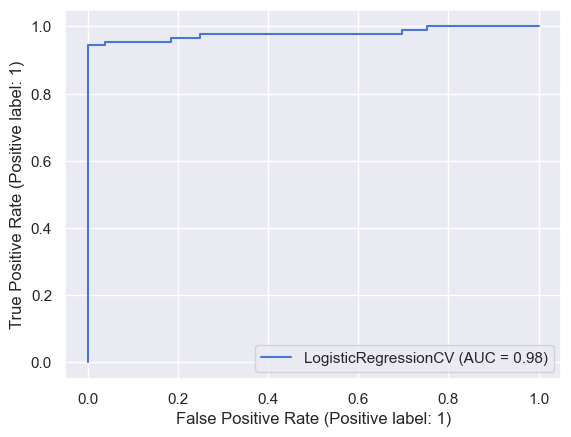

In [40]:
def fit_score(estimator, _x_train, _x_test):
    estimator.fit(_x_train, y_train)
    rc = RocCurveDisplay.from_estimator(estimator, _x_test, y_test)
    return rc.roc_auc


lr_cv = LogisticRegressionCV(
    max_iter=1600,
    scoring='roc_auc'
)
fit_score(lr_cv, x_train, x_test)

0.9694001582994121

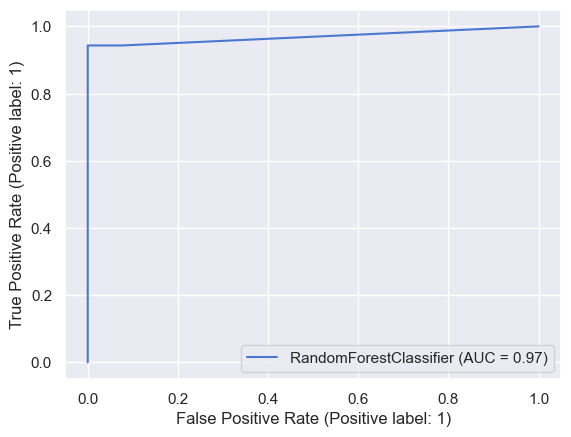

In [41]:
rf = RandomForestClassifier(random_state=0)
fit_score(rf, x_train, x_test)

##### Select from Model

Linear Base

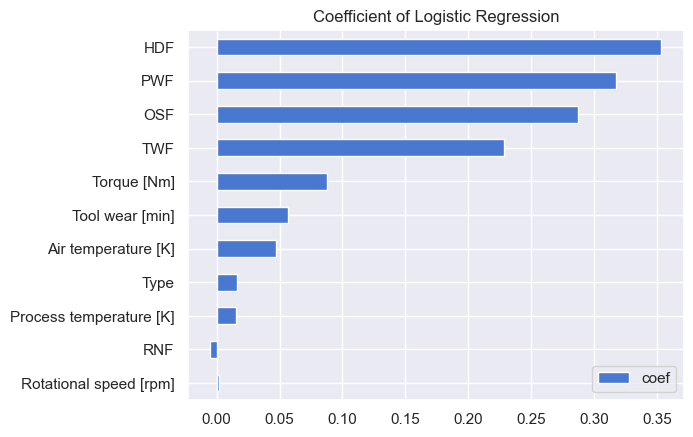

In [42]:
coef_df = pd.DataFrame(
    lr_cv.coef_[0],
    columns=['coef'],
    index=lr_cv.feature_names_in_
)
coef_df.sort_values('coef', inplace=True, key=np.abs)

coef_df.plot.barh()
plt.title('Coefficient of Logistic Regression')
plt.show()

In [43]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(lr_cv, threshold='mean', prefit=True)
_x_train = selector.transform(x_train)
_x_test = selector.transform(x_test)

_x_train.head()

c:\Users\User\anaconda3\envs\cuda_11.0\lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names



TWF    HDF      PWF      OSF
UDI  Product ID                                  
2968 L50147     -0.06847 -0.109 -0.09982 -0.09706
701  M15560     -0.06847 -0.109 -0.09982 -0.09706
3482 L50661     -0.06847 -0.109 -0.09982 -0.09706
1622 L48801     -0.06847 -0.109 -0.09982 -0.09706
801  M15660     -0.06847 -0.109 -0.09982 -0.09706

0.9715909090909092

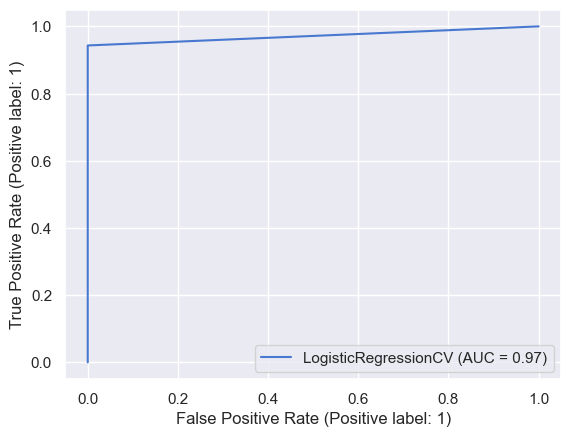

In [44]:
_lr_cv = LogisticRegressionCV(
    max_iter=1600,
    scoring='roc_auc'
)
fit_score(_lr_cv, _x_train, _x_test)

Tree Base

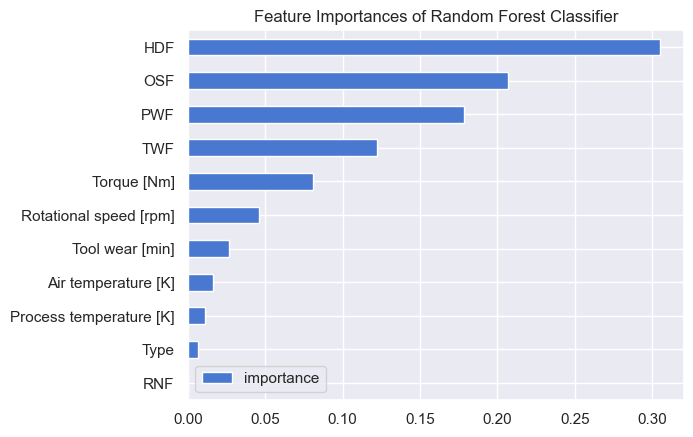

In [45]:
fi_df = pd.DataFrame(
    rf.feature_importances_,
    columns=['importance'],
    index=rf.feature_names_in_
)
fi_df.sort_values('importance', inplace=True)

fi_df.plot.barh()
plt.title('Feature Importances of Random Forest Classifier')
plt.show()

In [46]:
selector = SelectFromModel(rf, threshold='median', prefit=True)
_x_train = selector.transform(x_train)
_x_test = selector.transform(x_test)

_x_train.head()

c:\Users\User\anaconda3\envs\cuda_11.0\lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names



Rotational speed [rpm]  Torque [Nm]      TWF    HDF      PWF  \
UDI  Product ID                                                                 
2968 L50147                     -0.9497        1.167 -0.06847 -0.109 -0.09982   
701  M15560                      0.8042      -0.8381 -0.06847 -0.109 -0.09982   
3482 L50661                      0.6925      -0.8481 -0.06847 -0.109 -0.09982   
1622 L48801                       1.704       -1.811 -0.06847 -0.109 -0.09982   
801  M15660                       1.916        -1.58 -0.06847 -0.109 -0.09982   

                     OSF  
UDI  Product ID           
2968 L50147     -0.09706  
701  M15560     -0.09706  
3482 L50661     -0.09706  
1622 L48801     -0.09706  
801  M15660     -0.09706

0.9693177106889794

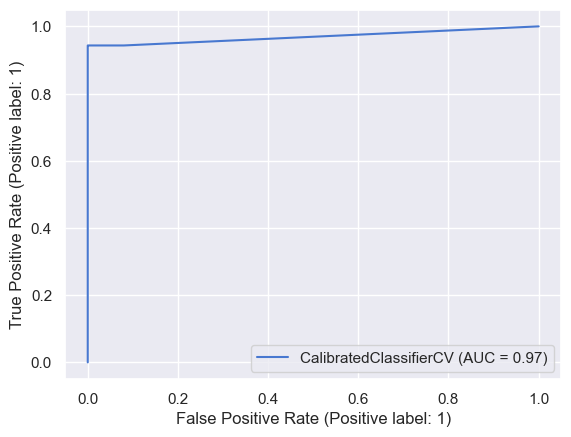

In [47]:
_rf = CalibratedClassifierCV(RandomForestClassifier(random_state=0))
fit_score(_rf, _x_train, _x_test)

In [48]:
from sklearn.feature_selection import GenericUnivariateSelect, f_classif, mutual_info_classif, chi2

x_train, x_test, y_train, y_test = train_test_split(
    data[ft.continuous],
    data[ft.machine_failure],
    random_state=0
)

pipe = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(include_bias=False)
)

x_train = pipe.fit_transform(x_train, y_train)
x_test = pipe.transform(x_test)

x_train.head()

NameError: name 'PolynomialFeatures' is not defined

In [ ]:
GenericUnivariateSelect(f_classif, mode='fpr', param=5e-2).fit_transform(x_train, y_train)

Air temperature [K]  Process temperature [K]   
UDI  Product ID                                                 
2968 L50147                   0.3012                  -0.4035  \
701  M15560                   -1.194                  -0.8056   
3482 L50661                    0.999                   0.6017   
1622 L48801                   -1.144                    -1.61   
801  M15660                   -1.493                   -1.409   
...                              ...                      ...   
9226 L56405                  -0.9947                  -0.6045   
4860 L52039                    1.846                    1.607   
3265 H32678                   0.6501                  0.06562   
9846 L57025                  -0.8452                  -0.6045   
2733 L49912                  -0.1473                  -0.5375   

                 Rotational speed [rpm]  Torque [Nm]  Tool wear [min]   
UDI  Product ID                                                         
2968 L50147                     -0.9497        1.167          -0.5603  \
701  M15560                      0.8042      -0.8381           -0.435   
3482 L50661                      0.6925      -0.8481          -0.4036   
1622 L48801                       1.704       -1.811          -0.7171   
801  M15660                       1.916        -1.58          -0.1529   
...                                 ...          ...              ...   
9226 L56405                        1.57        -1.64           0.2076   
4860 L52039                    -0.02247      -0.1363         0.003851   
3265 H32678                     -0.4693       0.4151            1.273   
9846 L57025                     -0.6593       0.7459           -1.156   
2733 L49912                      -1.078        1.748           0.4897   

                 Air temperature [K]^2   
UDI  Product ID                          
2968 L50147                    0.09075  \
701  M15560                      1.426   
3482 L50661                     0.9981   
1622 L48801                      1.309   
801  M15660                      2.229   
...                                ...   
9226 L56405                     0.9894   
4860 L52039                      3.409   
3265 H32678                     0.4227   
9846 L57025                     0.7143   
2733 L49912                    0.02171   

                 Air temperature [K] Rotational speed [rpm]   
UDI  Product ID                                               
2968 L50147                                         -0.2861  \
701  M15560                                         -0.9603   
3482 L50661                                          0.6919   
1622 L48801                                          -1.949   
801  M15660                                          -2.861   
...                                                     ...   
9226 L56405                                          -1.561   
4860 L52039                                         -0.0415   
3265 H32678                                         -0.3051   
9846 L57025                                          0.5572   
2733 L49912                                          0.1589   

                 Air temperature [K] Torque [Nm]   
UDI  Product ID                                    
2968 L50147                               0.3515  \
701  M15560                                1.001   
3482 L50661                              -0.8473   
1622 L48801                                2.072   
801  M15660                                2.359   
...                                          ...   
9226 L56405                                1.631   
4860 L52039                              -0.2517   
3265 H32678                               0.2699   
9846 L57025                              -0.6304   
2733 L49912                              -0.2576   

                 Process temperature [K] Torque [Nm]   
UDI  Product ID                                        
2968 L50147                                  -0.4709  \
701  M155

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    data[ft.discrete],
    data[ft.machine_failure],
    random_state=0
)
GenericUnivariateSelect(mutual_info_classif, mode='k_best', param=4).fit_transform(x_train, y_train)

TWF  HDF  PWF  OSF
UDI  Product ID                    
2968 L50147        0    0    0    0
701  M15560        0    0    0    0
3482 L50661        0    0    0    0
1622 L48801        0    0    0    0
801  M15660        0    0    0    0
...              ...  ...  ...  ...
9226 L56405        0    0    0    0
4860 L52039        0    0    0    0
3265 H32678        0    0    0    0
9846 L57025        0    0    0    0
2733 L49912        0    0    0    0

[7500 rows x 4 columns]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    data[ft.features],
    data[ft.machine_failure],
    random_state=0
)


pipe = make_pipeline(
    make_column_transformer(
        (TargetEncoder(random_state=0), ft.categorical),
        (GenericUnivariateSelect(mutual_info_classif, mode='k_best', param=4), ft.discrete),
        remainder='passthrough',
        verbose_feature_names_out=False,
    ),
    StandardScaler(),
    make_column_transformer(
        (
            make_pipeline(
                PolynomialFeatures(include_bias=False),
                GenericUnivariateSelect(f_classif, mode='k_best', param=10)
            ),
            ft.continuous
        ),
        remainder='passthrough',
        verbose_feature_names_out=False,
    )
)
x_train = pipe.fit_transform(x_train, y_train)
x_test = pipe.transform(x_test)

x_train

Air temperature [K]  Torque [Nm]  Tool wear [min]   
UDI  Product ID                                                      
2968 L50147                   0.3012        1.167          -0.5603  \
701  M15560                   -1.194      -0.8381           -0.435   
3482 L50661                    0.999      -0.8481          -0.4036   
1622 L48801                   -1.144       -1.811          -0.7171   
801  M15660                   -1.493        -1.58          -0.1529   
...                              ...          ...              ...   
9226 L56405                  -0.9947        -1.64           0.2076   
4860 L52039                    1.846      -0.1363         0.003851   
3265 H32678                   0.6501       0.4151            1.273   
9846 L57025                  -0.8452       0.7459           -1.156   
2733 L49912                  -0.1473        1.748           0.4897   

                 Air temperature [K] Torque [Nm]  Rotational speed [rpm]^2   
UDI  Product ID                                                              
2968 L50147                               0.3515                     0.902  \
701  M15560                                1.001                    0.6468   
3482 L50661                              -0.8473                    0.4796   
1622 L48801                                2.072                     2.902   
801  M15660                                2.359                      3.67   
...                                          ...                       ...   
9226 L56405                                1.631                     2.463   
4860 L52039                              -0.2517                 0.0005051   
3265 H32678                               0.2699                    0.2203   
9846 L57025                              -0.6304                    0.4346   
2733 L49912                              -0.2576                     1.163   

                 Rotational speed [rpm] Torque [Nm]   
UDI  Product ID                                       
2968 L50147                                  -1.108  \
701  M15560                                  -0.674   
3482 L50661                                 -0.5873   
1622 L48801                                  -3.084   
801  M15660                                  -3.027   
...                                             ...   
9226 L56405                                  -2.574   
4860 L52039                                0.003063   
3265 H32678                                 -0.1948   
9846 L57025                                 -0.4918   
2733 L49912                                  -1.885   

                 Rotational speed [rpm] Tool wear [min]  Torque [Nm]^2   
UDI  Product ID                                                          
2968 L50147                                      0.5322          1.362  \
701  M15560                                     -0.3498         0.7024   
3482 L50661                                     -0.2795         0.7193   
1622 L48801                                      -1.222          3.278   
801  M15660                                     -0.2929          2.496   
...                                                 ...            ...   
9226 L56405                                      0.3258           2.69   
4860 L52039                                  -8.655e-05        0.01858   
3265 H32678                                     -0.5976         0.1723   
9846 L57025                                       0.762         0.5564   
2733 L49912                                      -0.528          3.057   

                 Torque [Nm] Tool wear [min]  Tool wear [min]^2    Type   
UDI  Product ID                                                           
2968 L50147                          -0.6539              0.314  0.6802  \
701  M15560                           0.3645             0.1892  -1.215   
3482 L50661                           0.3423             0.1629  0.6191   
1622 L48801                          

0.978836876224936

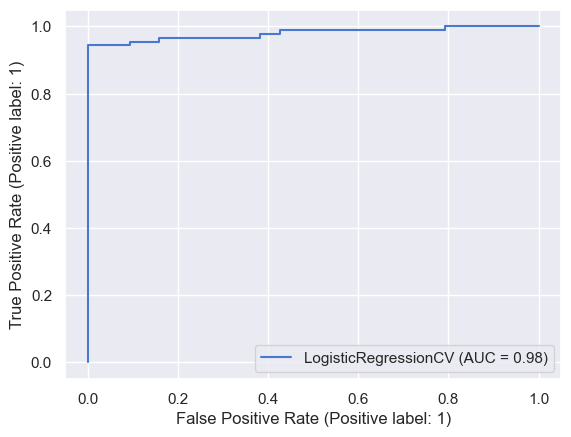

In [ ]:
_lr_cv = LogisticRegressionCV(
    max_iter=800,
    scoring='roc_auc'
).fit(x_test, y_test)

fit_score(_lr_cv, x_train, x_test)

0.9704389981908639

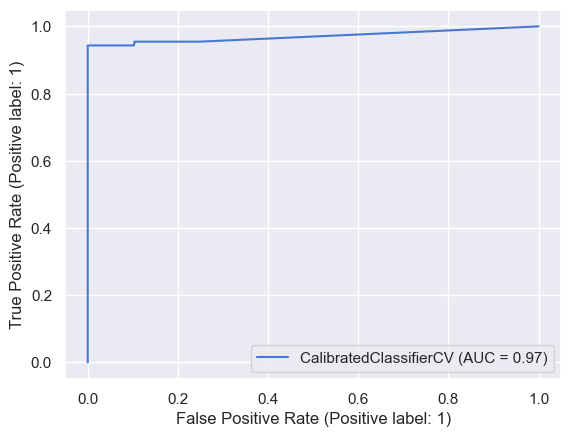

In [ ]:
_rf = CalibratedClassifierCV(RandomForestClassifier(random_state=0))
fit_score(_rf, x_train, x_test)

In [ ]:
from sklearn.feature_selection import RFECV

_lr_cv = LogisticRegressionCV(
    max_iter=800,
    scoring='roc_auc'
)
min_features = 1

rfecv = RFECV(
    estimator=_lr_cv,
    scoring="roc_auc",
    min_features_to_select=min_features,
)

fit_score(rfecv, x_train, x_test)

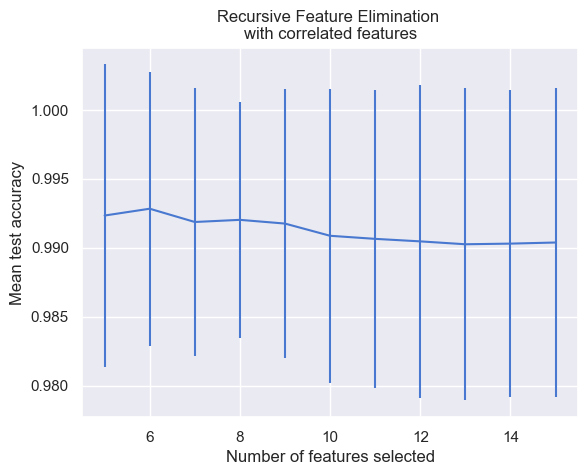

In [ ]:
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features, n_scores + min_features),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()